In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


(86, 86, 3)


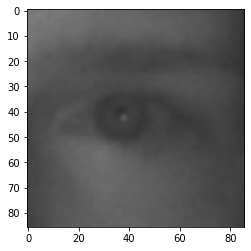

In [2]:
dir_path="C:/Users/Satvik/Desktop/jupyter/open_eyes (1563).png"
img= cv2.imread(dir_path)
img=cv2.resize(img,(86,86))
plt.imshow(img)
print(img.shape)

In [3]:
model=models.Sequential([layers.Conv2D(16,(3,3),activation='relu',input_shape=(86,86,1)),
                        layers.MaxPool2D(2,2),
                        #
                        layers.Conv2D(32,(3,3),activation='relu'),
                        layers.MaxPool2D(2,2),
                        #
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPool2D(2,2),
                        ##
                        layers.Flatten(),
                        ##
                        layers.Dense(128,activation='relu'),
                        ##
                        layers.Dense(1,activation='sigmoid')
                        ])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 84, 84, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0

In [5]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
train=ImageDataGenerator(rescale=1./255)
validation=ImageDataGenerator(rescale=1./255)

In [7]:
train_dataset=train.flow_from_directory("C:/Users/Satvik/Desktop/jupyter/base_dataset/train/",
                                       target_size=(86,86),
                                        batch_size=10,
                                        color_mode='grayscale',
                                        class_mode='binary',
                                       )
validation_dataset=train.flow_from_directory("C:/Users/Satvik/Desktop/minor project/Minor-Project/base_dataset/validation/",
                                       target_size=(86,86),
                                        batch_size=10,
                                        color_mode='grayscale',
                                        class_mode='binary',
                                       )

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'closed_eye': 0, 'open_eye': 1}

In [9]:
BS=10
SPE= len(train_dataset.classes)/BS
VS = len(validation_dataset.classes)/BS
print(SPE,VS)

300.0 100.0


In [18]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=SPE,
                   epochs=8,
                   validation_steps=VS,
                   validation_data=validation_dataset)
                   

Epoch 1/8
300/300 [==============================] - 81s 260ms/step - loss: 0.3481 - accuracy: 0.8151 - val_loss: 0.2020 - val_accuracy: 0.9590
Epoch 2/8
300/300 [==============================] - 20s 65ms/step - loss: 0.0763 - accuracy: 0.9728 - val_loss: 0.1415 - val_accuracy: 0.9650
Epoch 3/8
300/300 [==============================] - 18s 59ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.1641 - val_accuracy: 0.9670
Epoch 4/8
300/300 [==============================] - 17s 58ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.1407 - val_accuracy: 0.9760
Epoch 5/8
300/300 [==============================] - 19s 64ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.1488 - val_accuracy: 0.9760
Epoch 6/8
300/300 [==============================] - 18s 59ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.3346 - val_accuracy: 0.9330
Epoch 7/8
300/300 [==============================] - 18s 59ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.1671 - val_accuracy: 0.976

(1, 86, 86, 1)
[[1.]]
Open_eye


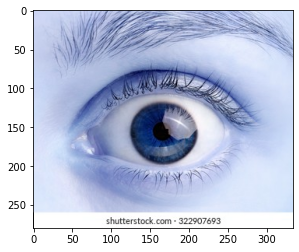

In [19]:
dir_path="C:/Users/Satvik/Desktop/jupyter/close-view-brown-wide-open-260nw-322907693 (1).jpg"
img= cv2.imread(dir_path)
plt.imshow(img)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img=cv2.resize(img,(86,86))
img=np.expand_dims(img,axis=(0,3))
print(img.shape)
prd=model.predict(img)
print(prd)
if prd==0:
    print('Close_eye')
else:
    print('Open_eye')

(1, 86, 86, 1)
[[1.]]
Open_eye


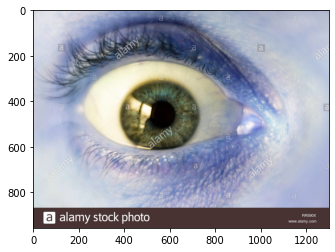

In [23]:
dir_path="C:/Users/Satvik/Desktop/jupyter/close-up-on-male-green-wide-open-eye-RR590X.jpg"
img= cv2.imread(dir_path)
plt.imshow(img)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img=cv2.resize(img,(86,86))
img=np.expand_dims(img,axis=(0,3))
print(img.shape)

prd=model.predict(img)
print(prd)
if prd==0:
    print('Close_eye')
else:
    print('Open_eye')


(1, 86, 86, 1)
[[0.]]
Close_eye


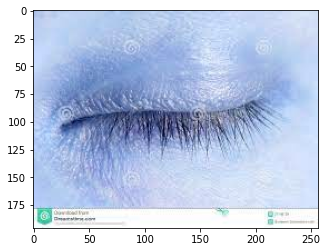

In [25]:

dir_path="C:/Users/Satvik/Desktop/jupyter/Close_eye_2.jpg"
img= cv2.imread(dir_path)
plt.imshow(img)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img=cv2.resize(img,(86,86))
img=np.expand_dims(img,axis=(0,3))
print(img.shape)

prd=model.predict(img)
print(prd)
if prd==0:
    print('Close_eye')
else:
    print('Open_eye')
    

(1, 86, 86, 1)
[[0.]]
Close_eye


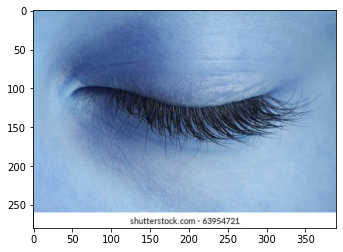

In [22]:
dir_path="C:/Users/Satvik/Desktop/jupyter/Close_eye_1.jpg"
img= cv2.imread(dir_path)
plt.imshow(img)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img=cv2.resize(img,(86,86))
img=np.expand_dims(img,axis=(0,3))
print(img.shape)

prd=model.predict(img)
print(prd)
if prd==0:
    print('Close_eye')
else:
    print('Open_eye')


(1, 86, 86, 1)
[[0.]]
Close_eye


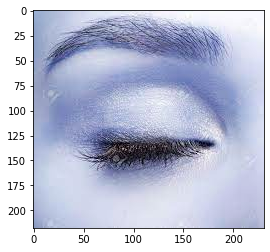

In [26]:

dir_path="C:/Users/Satvik/Desktop/jupyter/Close_eye_4.jpg"
img= cv2.imread(dir_path)
plt.imshow(img)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img=cv2.resize(img,(86,86))
img=np.expand_dims(img,axis=(0,3))
print(img.shape)

prd=model.predict(img)
print(prd)
if prd==0:
    print('Close_eye')
else:
    print('Open_eye')
    

In [27]:
model.save("Drowsiness_Detection_Driver_Model.h5")